<a href="https://colab.research.google.com/github/mariegulstad/IS4447LABS/blob/main/Copy_of_lab6_retailer_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 6

## Outline

Repeat exercises from Lab 5, but with the *SuperStore Retail Orders* dataset


<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab6_retailer_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [1]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl
import seaborn as sns
import matplotlib.pyplot as plt

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [2]:

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/superstore_retail_orders (1).csv')

Mounted at /content/gdrive


## Prepare Data

➡️ Assignment Tasks
- Convert any numbers, such as Total_Amount into a number (not a string)
- Remove rows with empty (NULL) values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56045 entries, 0 to 56044
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          56045 non-null  int64  
 1   order_date        56013 non-null  object 
 2   order_year_month  56013 non-null  object 
 3   customer_name     56045 non-null  object 
 4   city              55571 non-null  object 
 5   state_province    55571 non-null  object 
 6   quantity          56006 non-null  float64
 7   product_name      56045 non-null  object 
 8   product_line      56045 non-null  object 
 9   product_price     56045 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


In [5]:
df['total_amount'] = df['quantity'] * df['product_price']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56045 entries, 0 to 56044
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          56045 non-null  int64  
 1   order_date        56013 non-null  object 
 2   order_year_month  56013 non-null  object 
 3   customer_name     56045 non-null  object 
 4   city              55571 non-null  object 
 5   state_province    55571 non-null  object 
 6   quantity          56006 non-null  float64
 7   product_name      56045 non-null  object 
 8   product_line      56045 non-null  object 
 9   product_price     56045 non-null  float64
 10  total_amount      56006 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.7+ MB


In [7]:
df_clean = df.dropna()

## Create Basic Charts

➡️ Assignment Tasks
Your target variable is Total Sales (count of sales)
- Create a bar chart
- Create a histogram
- Create a box plot
- Create a scatter plot
Each visualization should bring some insight into the total sales.

In [8]:
df_clean['total_sales'] = df_clean['quantity'] * df_clean['product_price']

<ipython-input-8-bf3df0657bbb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['total_sales'] = df_clean['quantity'] * df_clean['product_price']


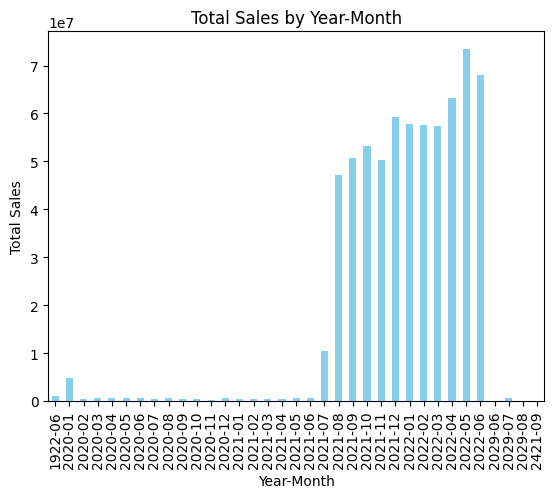

In [11]:
#bar chart
df_clean.groupby('order_year_month')['total_sales'].sum().plot(kind='bar', color='skyblue')
plt.title('Total Sales by Year-Month')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()


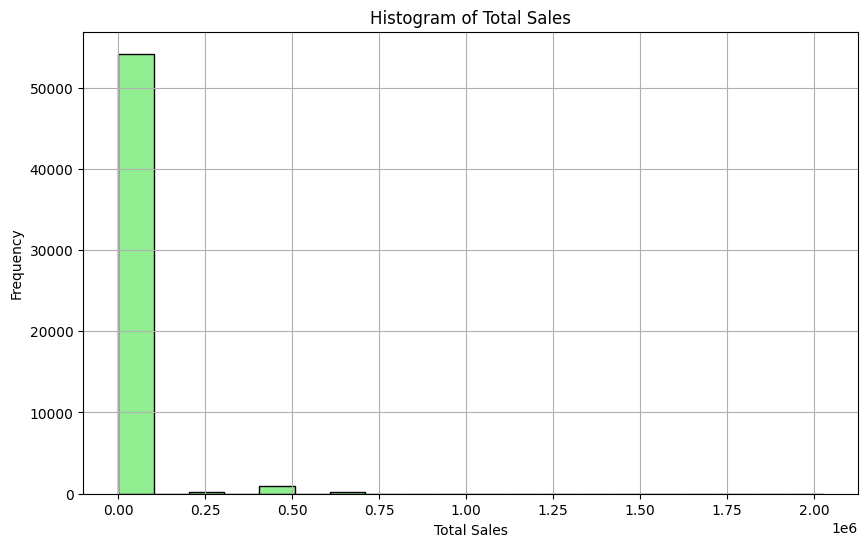

In [12]:
#histogram
plt.figure(figsize=(10, 6))
plt.hist(df_clean['total_sales'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

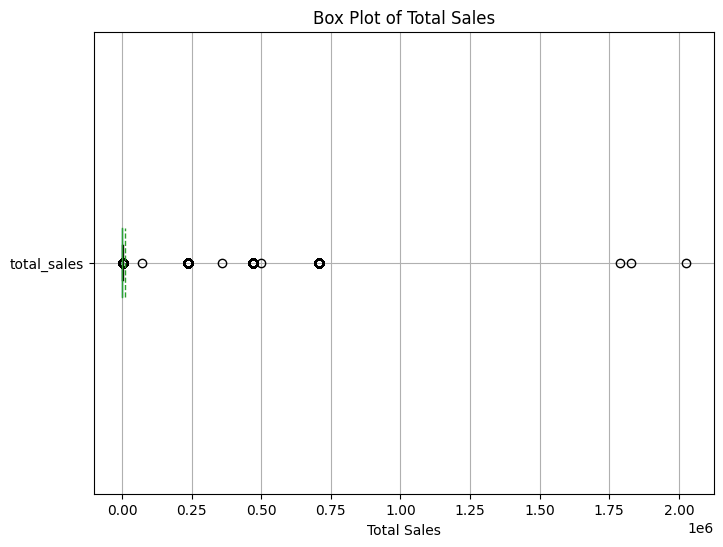

In [13]:
#box plot
plt.figure(figsize=(8, 6))
df_clean.boxplot(column='total_sales', vert=False, patch_artist=True, meanline=True, showmeans=True)
plt.title('Box Plot of Total Sales')
plt.xlabel('Total Sales')
plt.show()

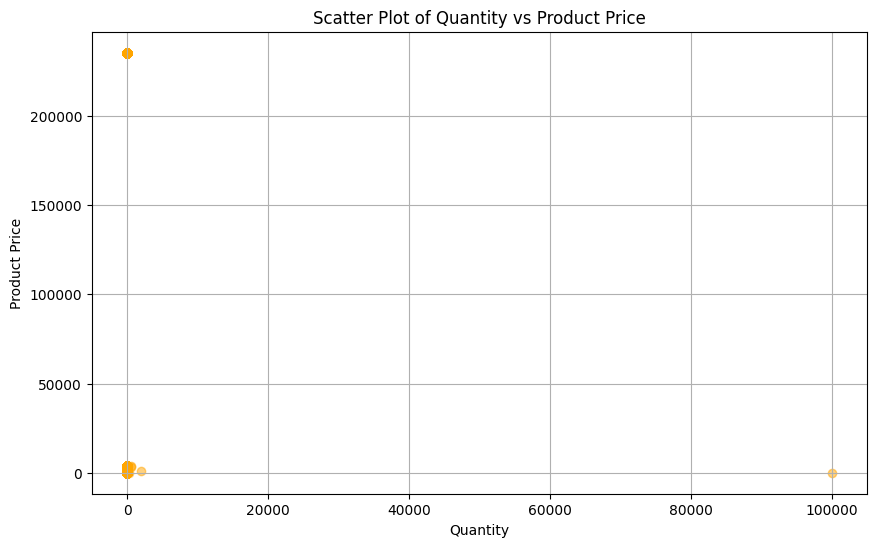

In [14]:
#scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['quantity'], df_clean['product_price'], alpha=0.5, color='orange')
plt.title('Scatter Plot of Quantity vs Product Price')
plt.xlabel('Quantity')
plt.ylabel('Product Price')
plt.grid(True)
plt.show()

## Explore Relationships

➡️ Assignment Tasks
Your target variable is Total Sales (count of sales)
- How does the month of year affect sales?
- What are the best states for sales?
- What are the best and worst products for sales?

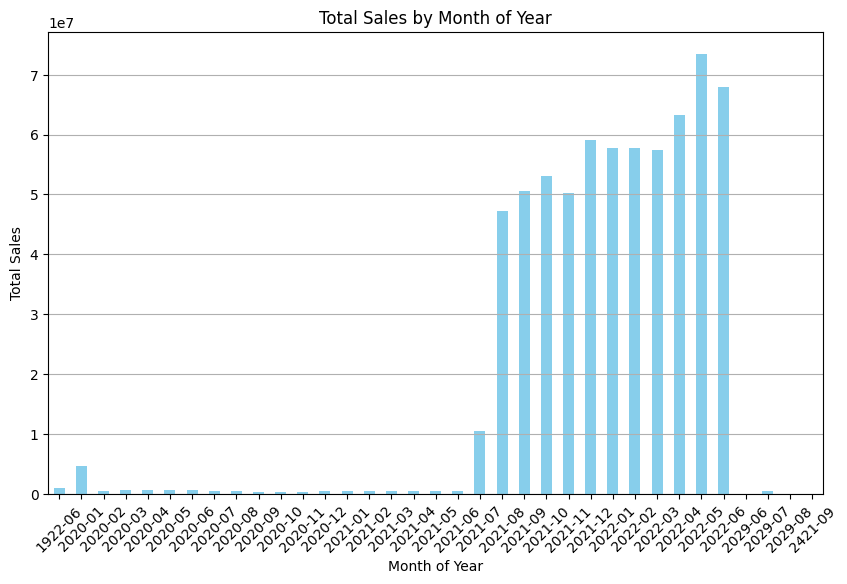

In [15]:
#month of year
monthly_sales = df_clean.groupby('order_year_month')['total_sales'].sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Month of Year')
plt.xlabel('Month of Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [16]:
#sales by state
state_sales = df_clean.groupby('state_province')['total_sales'].sum().sort_values(ascending=False)
print("Top States for Sales:")
print(state_sales.head(10))

Top States for Sales:
state_province
UTAH                         17500697.45
IOWA                         17418437.25
GEORGIA                      17253602.80
CONNECTICUT                  16782062.39
MISSOURI                     16553579.53
SOUTH CAROLINA               16534876.47
PENNSYLVANIA                 16211918.02
OREGON                       16097882.90
MINNESOTA                    16053157.31
NEBRASKA                     16022240.82
Name: total_sales, dtype: float64


In [17]:
#sales by product
product_sales = df_clean.groupby('product_name')['total_sales'].sum().sort_values(ascending=False)
print("\nTop Products for Sales:")
print(product_sales.head(10))
print("\nWorst Products for Sales:")
print(product_sales.tail(10))


Top Products for Sales:
product_name
Half-Finger Gloves, M                                                                                          2.142877e+08
Half-Finger Gloves, S                                                                                          2.074588e+08
Half-Finger Gloves, L                                                                                          1.978040e+08
Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM, 128GB Storage) with No Cost EMI & Additional Exchange Offers    3.731650e+06
VU 138 cm (55 inches) Premium Series 4K Ultra HD Smart IPS LED TV 55UT (Black)                                 3.124745e+06
Gaming Laptop Silver                                                                                           2.415332e+06
Projector Black, 44                                                                                            2.122869e+06
Mountain-200 Black, 46                                                                        

## Pair Plot

➡️ Assignment Tasks
- Create a pair plot showing any relevant variables, with the color determined by total sales

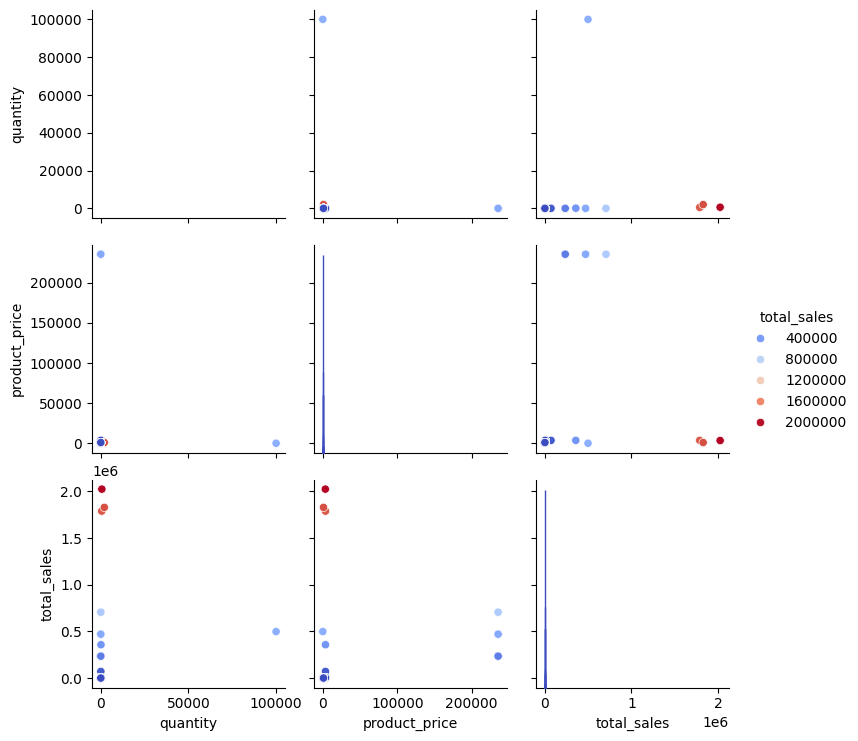

In [18]:
#pair plot
sns.pairplot(df_clean, vars=['quantity', 'product_price', 'total_sales'], hue='total_sales', palette='coolwarm')
plt.show()